## Sparse and Sparse-Variational GPs

We can define sparse and sparse-variational approaches at build time.

In [1]:
import mogptk
import numpy as np
import time
#############################################################################################
#First, a simple example for 3 sine curves.
X_list = []
#We construct a new set of observations, noting that observations must be sorted according to X axis.
#We generate 3000 random values from the interval [0,4) 3 times and store them in a list.
#Each element of the list is a sorted array of 100 values.
for new_observation in range(3):
    X_list.append(np.sort(np.random.uniform(0, 4, 1000)))

#Now we generate our observations, based on the previously randomly chosen X values.
#Each element of y_list corresponds to one element of X_list (e.g: X_list[0] are the 
#X values of y_list[0]).
y_list = []
#Sine(6X) + Noise
y_list.append(np.sin(6*X_list[0]) + np.random.standard_t(3, X_list[0].shape)*0.03)
#Sine(6X+2) + Noise
y_list.append(np.sin(6*X_list[1] + 2) + np.random.standard_t(3, X_list[1].shape)*0.03)
#Sine(6X+2) - Sine(4X) + Noise
y_list.append(np.sin(6*X_list[2] + 2) - np.sin(4*X_list[2]) + np.random.standard_t(3, X_list[2].shape)*0.03)

def latent1(x):
    return np.sin(6*x)

def latent2(x):
    return np.sin(6*x + 2)

def latent3(x):
    return np.sin(6*x + 2) - np.sin(4*x)
##############################################

We will compare the training time of the full model (using all 3000 points)

In [2]:
model = mogptk.model(3)
model.add_training_data(X_list,y_list)
parameters = {'components': 3}
model.build_model('MOSM', 'full', parameters=parameters)

channels  [0 1 2]
elements per channel  [1000 1000 1000]
input dimensions  1
output dimensions  3
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


In [3]:
start = time.time()
model.optimize(iterations = 50, display=True)
end = time.time()
print("Total training time ", end-start)

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -4586.715436
  Number of iterations: 50
  Number of functions evaluations: 78


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -4586.715436
  Number of iterations: 50
  Number of functions evaluations: 78


Total training time  742.2302091121674


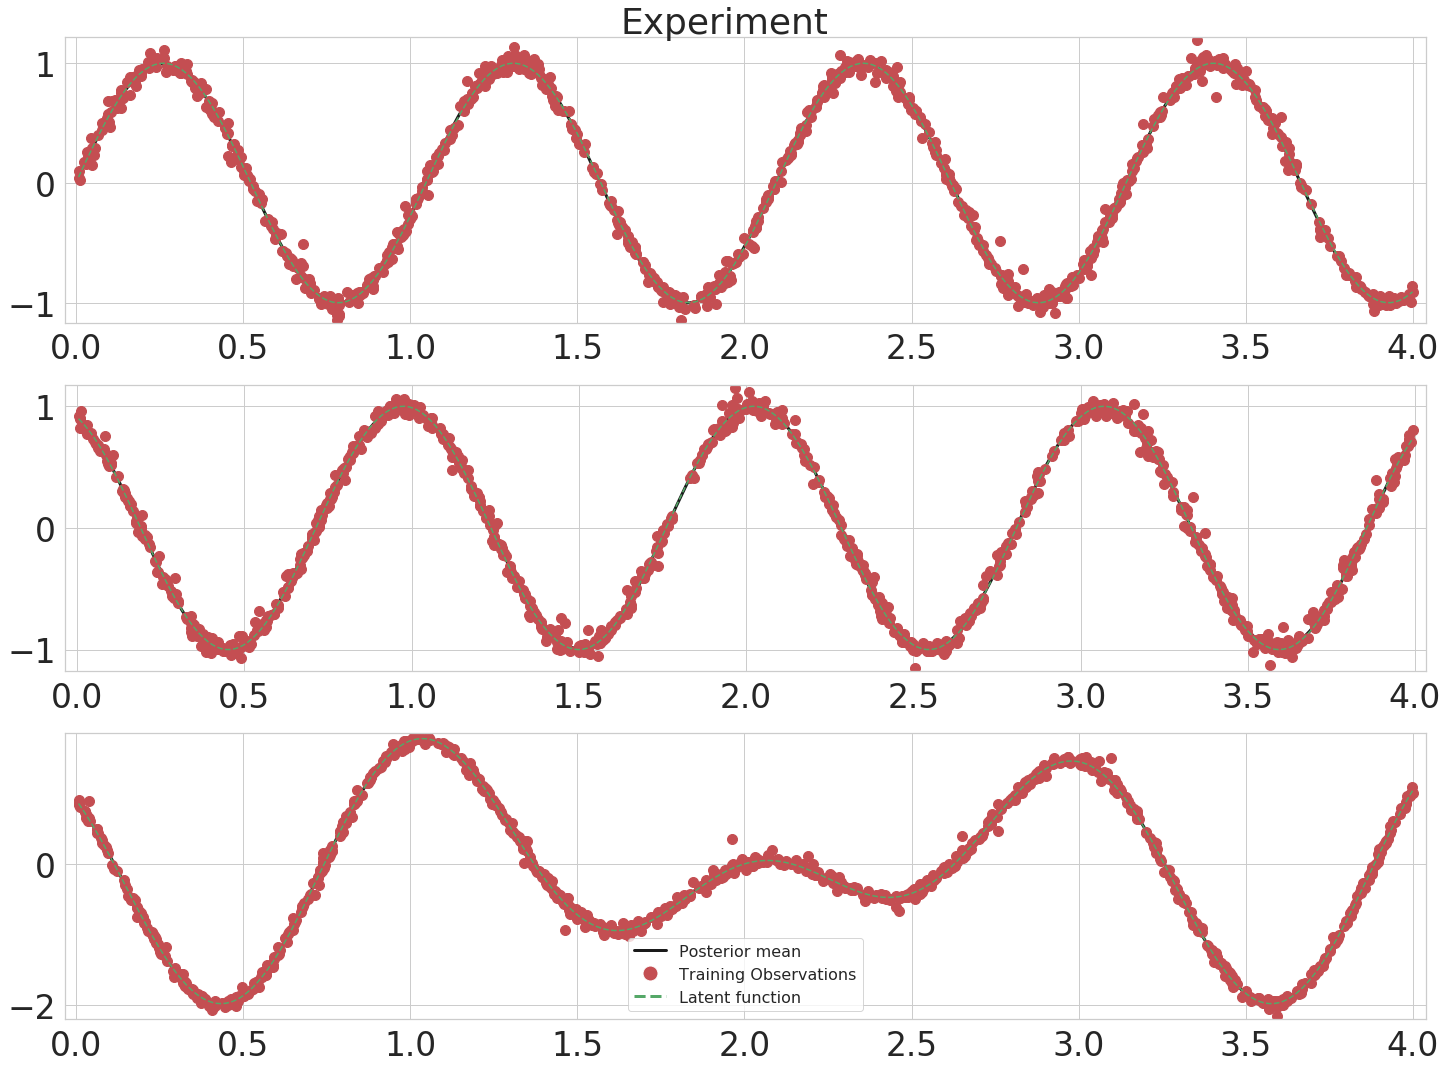

In [4]:
X_pred = model.predict_interval(300, [0,1,2])
Y_pred, STD_pred = model.predict(X_pred)
model.define_latent_functions([latent1, latent2, latent3], [0,1,2])
model.make_plots("sparse_full.png")

Vs the training time of a sparse model (Titsias) with 10 inducing points per channel. Note, also, that there's a graph creation and initialization overhead that is considerable with respect to the total train time of the sparse example.

In [6]:
import gpflow
gpflow.reset_default_graph_and_session()
model = mogptk.model(3)
model.add_training_data(X_list,y_list)
parameters = {'components': 3, 'number_of_inducing_points': 10}
model.build_model('MOSM', 'sparse', parameters=parameters)

channels  [0 1 2]
elements per channel  [1000 1000 1000]
input dimensions  1
output dimensions  3


In [7]:
start = time.time()
model.optimize(iterations = 50, display=True)
end = time.time()
print("Total training time ", end-start)

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -4017.269662
  Number of iterations: 50
  Number of functions evaluations: 64


INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -4017.269662
  Number of iterations: 50
  Number of functions evaluations: 64


Total training time  99.79664874076843


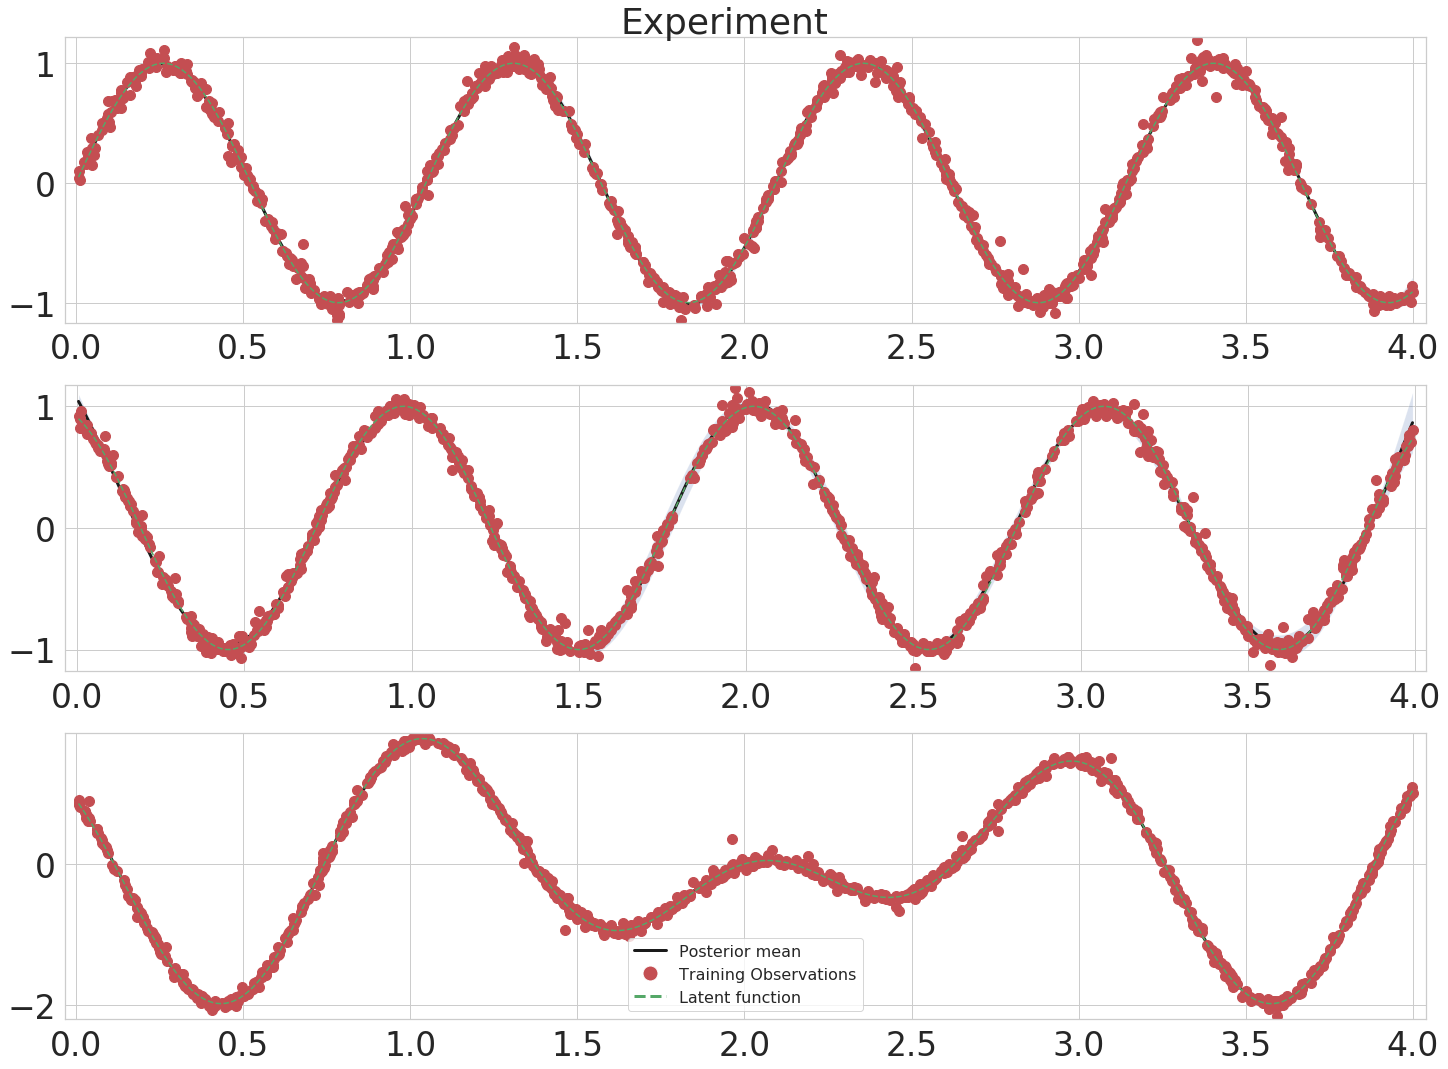

In [8]:
X_pred = model.predict_interval(300, [0,1,2])
Y_pred, STD_pred = model.predict(X_pred)
model.define_latent_functions([latent1, latent2, latent3], [0,1,2])
model.make_plots("sparse.png")

The following is a representation of the evolution of the inducing points per channel. At first (red crosses) the inducing points are 10 equidistant points in the [0, 4] range, but after optimization they move (blue crosses).

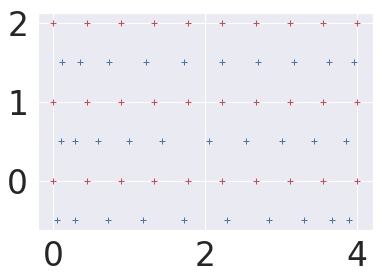

In [9]:
model.plot_inducing_points('sparse')